<a href="https://colab.research.google.com/github/ShimaaAlaaGomaa/Employee-dashboard-using-power-BI-/blob/main/Copy_of_Python_task_nti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import files
uploaded = files.upload()

Saving road_accident_data.xlsx to road_accident_data.xlsx


In [ ]:

import pandas as pd

df = pd.read_excel('road_accident_data.xlsx')

print(df.head())
print(df.columns)
print(df.info())

       ID          State                Date Day_of_Week Time_of_Day  \
0  165433    Connecticut 2024-02-20 05:46:20     Tuesday    19:59:02   
1  165434  Massachusetts 2024-01-09 05:08:31   Wednesday    21:28:51   
2  165435        Wyoming 2024-02-20 08:26:27    Thursday    18:04:26   
3  165436         Hawaii 2024-01-15 03:23:47      Sunday    16:51:02   
4  165437       Oklahoma 2024-02-10 10:17:29     Tuesday    14:19:19   

  Weather_Conditions Road_Conditions Light_Conditions Type_of_Road  \
0              Rainy           Muddy         Daylight       Street   
1              Sunny           Muddy         Daylight      Highway   
2              Snowy           Snowy             Dawn       Street   
3              Snowy             Icy         Daylight       Street   
4              Foggy             Icy            Night        Rural   

  Type_of_Junction  ... Num_Vehicles_Involved Num_Casualties Speed_Limit  \
0       T-Junction  ...                     2              3        57

In [ ]:

duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

df = df.drop_duplicates()

print("New shape after removing duplicates:", df.shape)

Number of duplicate rows: 0
New shape after removing duplicates: (1610, 23)


In [ ]:
df = df.dropna(thresh=len(df.columns) // 2)

In [ ]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
obj_cols = df.select_dtypes(include=['object']).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].mean())
df[obj_cols] = df[obj_cols].fillna(df[obj_cols].mode().iloc[0])

In [ ]:
print(df.isnull().sum())

ID                                    0
State                                 0
Date                                  0
Day_of_Week                           0
Time_of_Day                           0
Weather_Conditions                    0
Road_Conditions                       0
Light_Conditions                      0
Type_of_Road                          0
Type_of_Junction                      0
Type_of_Accident                      0
Vehicle_Type                          0
Driver_Age_Group                      0
Num_Vehicles_Involved                 0
Num_Casualties                        0
Speed_Limit                           0
Distance_to_Nearest_Hospital          0
Distance_to_Nearest_Police_Station    0
Visibility                            0
Road_Width                            0
Road_Surface_Friction_Coefficient     0
Vehicle_Speed                         0
Time_Taken_for_Emergency_Response     0
dtype: int64


In [ ]:
print(df.dtypes)

ID                                             int64
State                                         object
Date                                  datetime64[ns]
Day_of_Week                                   object
Time_of_Day                                   object
Weather_Conditions                            object
Road_Conditions                               object
Light_Conditions                              object
Type_of_Road                                  object
Type_of_Junction                              object
Type_of_Accident                              object
Vehicle_Type                                  object
Driver_Age_Group                              object
Num_Vehicles_Involved                          int64
Num_Casualties                                 int64
Speed_Limit                                  float64
Distance_to_Nearest_Hospital                 float64
Distance_to_Nearest_Police_Station           float64
Visibility                                   f

In [ ]:
df['Hour'] = pd.to_datetime(df['Time_of_Day'], format='%H:%M:%S').dt.hour

def get_period(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Time_Period'] = df['Hour'].apply(get_period)

In [ ]:
print(df.duplicated().sum())

0


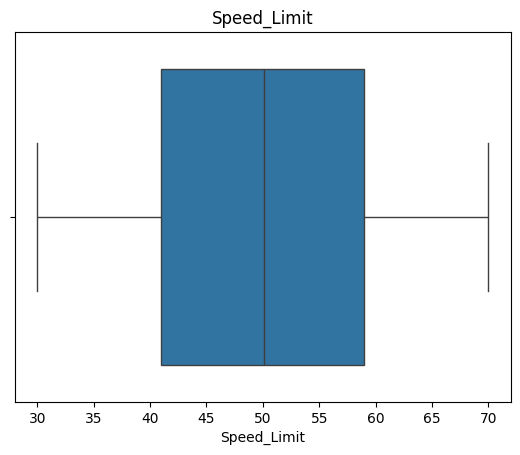

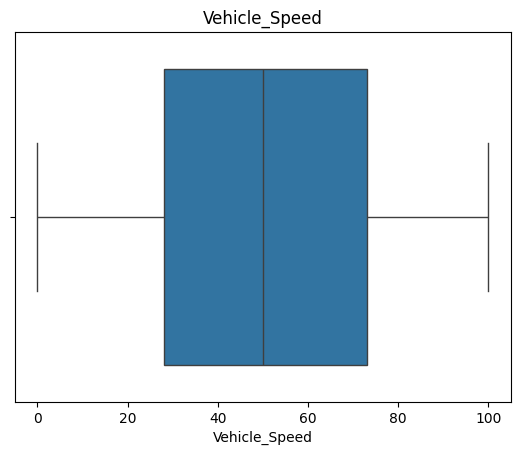

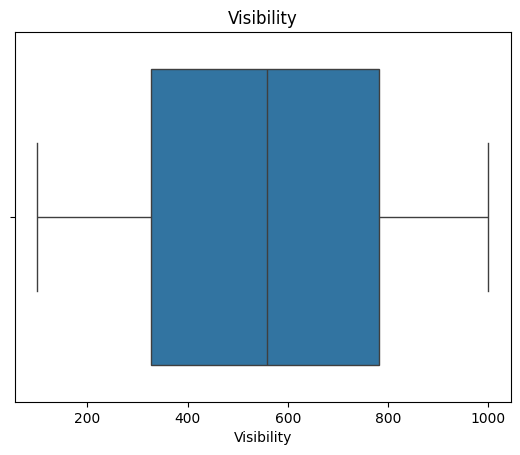

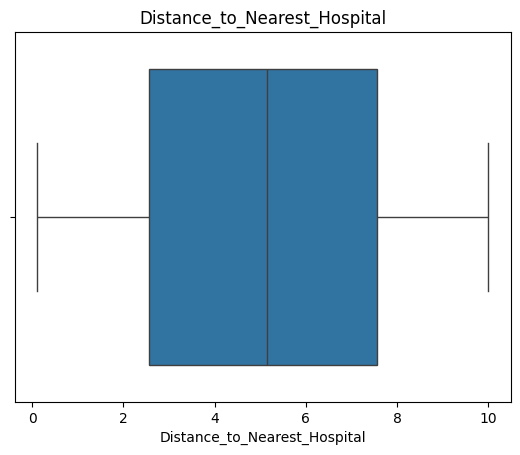

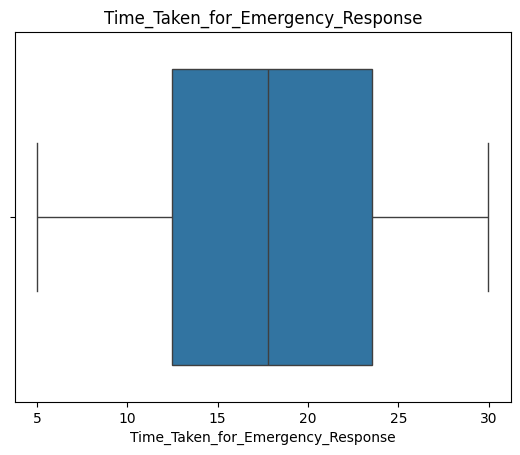

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['Speed_Limit', 'Vehicle_Speed', 'Visibility', 'Distance_to_Nearest_Hospital', 'Time_Taken_for_Emergency_Response']

for col in num_cols:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

In [ ]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f'Column: {col} - Outliers: {len(outliers)}')

Column: ID - Outliers: 0
Column: Num_Vehicles_Involved - Outliers: 0
Column: Num_Casualties - Outliers: 0
Column: Speed_Limit - Outliers: 0
Column: Distance_to_Nearest_Hospital - Outliers: 0
Column: Distance_to_Nearest_Police_Station - Outliers: 0
Column: Visibility - Outliers: 0
Column: Road_Width - Outliers: 0
Column: Road_Surface_Friction_Coefficient - Outliers: 0
Column: Vehicle_Speed - Outliers: 0
Column: Time_Taken_for_Emergency_Response - Outliers: 0


In [ ]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num_cols = df.select_dtypes(include=['float64', 'int64']).columns

df[num_cols] = scaler.fit_transform(df[num_cols])

In [ ]:
print(df.head())

         ID          State                Date Day_of_Week Time_of_Day  \
0  0.000000    Connecticut 2024-02-20 05:46:20     Tuesday    19:59:02   
1  0.000622  Massachusetts 2024-01-09 05:08:31   Wednesday    21:28:51   
2  0.001243        Wyoming 2024-02-20 08:26:27    Thursday    18:04:26   
3  0.001865         Hawaii 2024-01-15 03:23:47      Sunday    16:51:02   
4  0.002486       Oklahoma 2024-02-10 10:17:29     Tuesday    14:19:19   

  Weather_Conditions Road_Conditions Light_Conditions Type_of_Road  \
0              Rainy           Muddy         Daylight       Street   
1              Sunny           Muddy         Daylight      Highway   
2              Snowy           Snowy             Dawn       Street   
3              Snowy             Icy         Daylight       Street   
4              Foggy             Icy            Night        Rural   

  Type_of_Junction  ... Speed_Limit Distance_to_Nearest_Hospital  \
0       T-Junction  ...       0.675                     0.322671  

In [ ]:
df.to_excel('road_accident_data_clean_normalized.xlsx', index=False)